In [ ]:
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

Plan :

1. Bibliography : quick summary of the first 
papers, keep the good ideas of modelisation, evaluation, visualisation...
2. Descriptive analysis of the data : genres distribution, genres cardinality, density
3. Definition of the evaluation metrics to keep
4. Definition of the baselines to have a first naive evaluation metric to compare with our future models
5. Split of the dataset (train / validation / test)
6. Some first ML models to predict the genres (binary classification or multi classification)
7. Deepdive into evaluation, results and interpretation
8. Graphic visualisation of the genres distribution
9. More work on the data: NLP on the song titles
10. If time: ensemble techniques

In [ ]:
df= pd.read_parquet("dataset2.parquet", engine="pyarrow")


OSError: ignored

In [ ]:
df= pd.read_parquet("dataset.parquet", engine="pyarrow")

FileNotFoundError: ignored

In [ ]:
df.head(10)

NameError: ignored

In [ ]:
df.describe()

,asian,rnb,reggae,blues,pop,dance,folk,arabic-music,indie,rock,soulfunk,latin,classical,k-pop,brazilian,metal,rap,jazz,electronic,african,country,song_index
count,56763.000000,56763.000000,56763.000000,56763.000000,56763.000000,56763.000000,56763.000000,56763.000000,56763.000000,56763.000000,56763.000000,56763.000000,56763.000000,56763.000000,56763.000000,56763.000000,56763.000000,56763.000000,56763.000000,56763.000000,56763.000000,56763.000000
mean,0.011539,0.040643,0.045575,0.008474,0.132992,0.082342,0.019714,0.053662,0.047196,0.157973,0.028381,0.057256,0.021387,0.022444,0.051319,0.116238,0.095309,0.030830,0.094604,0.027976,0.032662,28198.247943
std,0.106800,0.197463,0.208564,0.091663,0.339569,0.274888,0.139015,0.225351,0.212060,0.364719,0.166061,0.232332,0.144672,0.148124,0.220649,0.320513,0.293643,0.172858,0.292670,0.164905,0.177752,16318.163102
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14056.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28186.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42333.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,56483.000000


In [ ]:
# 12% metal, 16% rock, 13% pop

In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56763 entries, 0 to 56762
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   asian           56763 non-null  int32 
 1   rnb             56763 non-null  int32 
 2   reggae          56763 non-null  int32 
 3   blues           56763 non-null  int32 
 4   pop             56763 non-null  int32 
 5   dance           56763 non-null  int32 
 6   folk            56763 non-null  int32 
 7   arabic-music    56763 non-null  int32 
 8   indie           56763 non-null  int32 
 9   rock            56763 non-null  int32 
 10  soulfunk        56763 non-null  int32 
 11  latin           56763 non-null  int32 
 12  classical       56763 non-null  int32 
 13  k-pop           56763 non-null  int32 
 14  brazilian       56763 non-null  int32 
 15  metal           56763 non-null  int32 
 16  rap             56763 non-null  int32 
 17  jazz            56763 non-null  int32 
 18  electr

In [ ]:
# 26 variables: 4 object, 1 index et 21 binaires (genre musical)

In [ ]:
df1= df.drop('song_index', 1)
df1.head()

,asian,rnb,reggae,blues,pop,dance,folk,arabic-music,indie,rock,soulfunk,latin,classical,k-pop,brazilian,metal,rap,jazz,electronic,african,country,audio_features,usage_features,artist_name,song_title
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,"[0.004609544623288757, -0.0025426075215611364,...","[0.004609544623288757, -0.0025426075215611364,...",Mötley Crüe,Don't Go Away Mad (Just Go Away)
1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,"[-0.0008367261824495899, 0.0025827261205318714...","[-0.0008367261824495899, 0.0025827261205318714...",No Doubt,Don't Speak
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,"[-0.004236157405375977, -0.012008278441109134,...","[-0.004236157405375977, -0.012008278441109134,...",John Williams,The Scroll / To Pankot Palace
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,"[0.005594505700256676, -0.0006087187218074026,...","[0.005594505700256676, -0.0006087187218074026,...",Traffic,Dear Mr. Fantasy
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[-0.013316938885673776, -0.004851930165088419,...","[-0.013316938885673776, -0.004851930165088419,...",Lady Gaga,LoveGame


In [ ]:
corr_df=df1.corr()

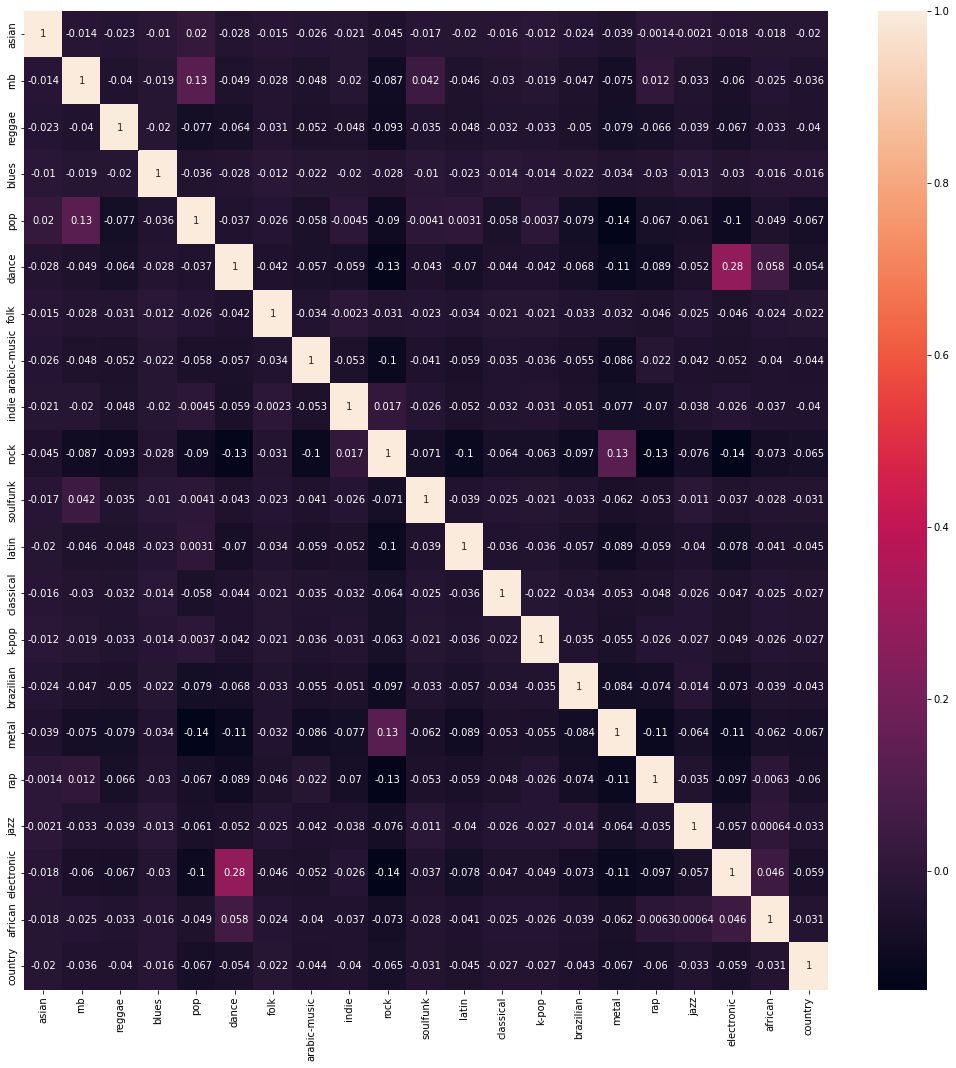

In [ ]:
plt.figure(figsize=(18, 18))
sns.heatmap(corr_df, annot=True)
plt.show()

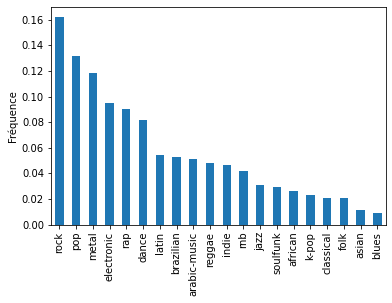

In [ ]:
labels=list(df.columns)
labels.remove('country')
labels.remove('song_index')
labels.remove('audio_features')
labels.remove('usage_features')
labels.remove('artist_name')
labels.remove('song_title')
n=len(labels)
y=df[labels].mean().sort_values(ascending=False)
ax = y.plot(kind='bar')
ax.set_ylabel('Fréquence')
plt.show()

In [ ]:
D = len(df) #nombre de chansons de la base
L = 21 #nombre de genres
df["nbr labels"] = df.iloc[:,0:21].sum(axis=1) #nombre de labels par chanson

In [ ]:
#label cardinality
label_cardinality = df["nbr labels"].sum()/D
print(label_cardinality)

#label density
label_density = label_cardinality/L
print(label_density)

1.1785141729647834
0.05611972252213254


Text(0.5, 1.0, 'Le nombre de labels par chanson')

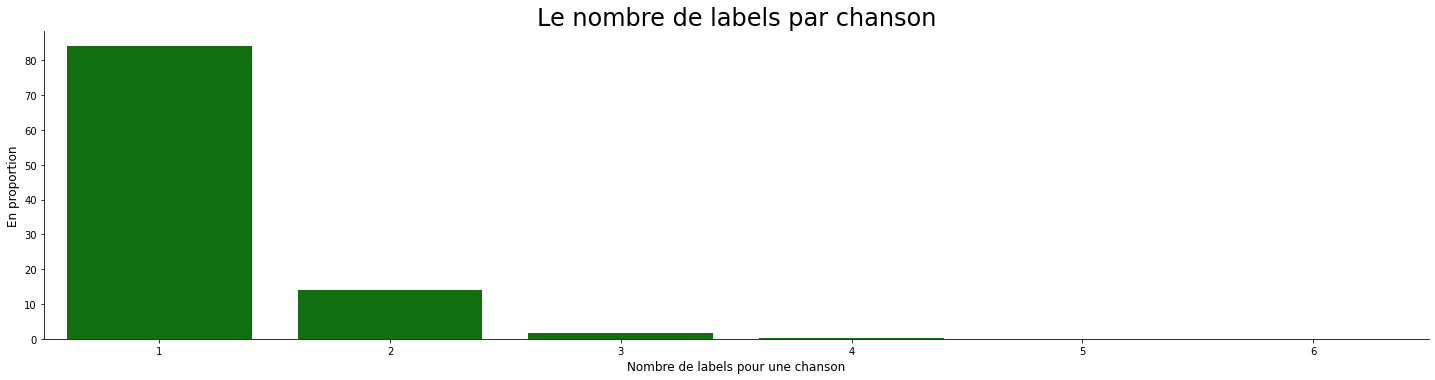

In [ ]:
# Les chansons en fonction du nombre de labels
df2=df.groupby("nbr labels").agg({'asian':'count'})
df2.rename({'asian':'Nbre de chansons'},axis=1,inplace=True)
df2["Nbre labels"]=df2.index
df2["Pourcentage"]=df2['Nbre de chansons']*100/D
g = sns.catplot(x='Nbre labels', y='Pourcentage', data=df2, kind = "bar", height = 5, aspect = 4, color = "green")
g.set_axis_labels('', '')
plt.xlabel('Nombre de labels pour une chanson', size = 12)
plt.ylabel('En proportion', size = 12)
plt.title('Le nombre de labels par chanson', size=24)